# Multi-Layer Perceptrons: From Theory to Classification

**Exercise:** [![Open in Colab](https://img.shields.io/badge/Open%20in-Colab-F9AB00?style=flat-square&logo=googlecolab)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/docs/00-mlp/00b-mlp-classification-exercise.ipynb)
**Solution:** [![Open in Colab](https://img.shields.io/badge/Open%20in-Colab-F9AB00?style=flat-square&logo=googlecolab)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/docs/00-mlp/00b-mlp-classification.ipynb)

This notebook introduces **Multi-Layer Perceptrons (MLPs)** from fundamental concepts to practical classification applications. We'll build neural networks from scratch, understand their mathematical foundations, and apply them to solve real-world geotechnical engineering problems.

## Learning Objectives

By the end of this notebook, you will understand:

1. **The Perceptron**: The fundamental building block of neural networks
2. **Activation Functions**: Why non-linearity is essential for learning complex patterns
3. **MLP Architecture**: How layers combine to create powerful function approximators
4. **Automatic Differentiation**: How neural networks compute gradients efficiently
5. **Gradient Descent**: The optimization algorithm that trains neural networks
6. **Classification**: Applying MLPs to real-world decision-making problems

We'll demonstrate these concepts using a practical geotechnical engineering problem: predicting earthquake-induced liquefaction."

# Part I: Understanding the Building Blocks

## What is a Perceptron?

The **perceptron** is the fundamental unit of a neural network, inspired by biological neurons. It takes multiple inputs, computes a weighted sum, adds a bias, and passes the result through an activation function.

### Mathematical Definition

For inputs $\boldsymbol{x} = [x_1, x_2, ..., x_n]$ and weights $\boldsymbol{w} = [w_1, w_2, ..., w_n]$:

$$z = \boldsymbol{w}^T\boldsymbol{x} + b = \sum_{i=1}^n w_i x_i + b$$

$$\hat{y} = g(z)$$

Where:
- $z$ is the **pre-activation** (linear combination)
- $g(z)$ is the **activation function** (introduces non-linearity)
- $b$ is the **bias** (shifts the decision boundary)
- $\hat{y}$ is the **output**

### The Key Components

1. **Inputs** ($\boldsymbol{x}$): The features or data we want to process
2. **Weights** ($\boldsymbol{w}$): Learnable parameters that determine feature importance
3. **Bias** ($b$): Learnable parameter that shifts the activation threshold
4. **Activation Function** ($g$): Non-linear function that enables complex pattern learning

![Perceptron Diagram](https://raw.githubusercontent.com/kks32-courses/ut-portugal-sciml/main/docs/00-mlp/figs/perceptron.png)

### Why Do We Need Multiple Perceptrons?

A single perceptron can only learn **linear decision boundaries**. For complex patterns, we need to combine multiple perceptrons into **layers**, creating a **Multi-Layer Perceptron (MLP)**."

# Part II: The Critical Role of Activation Functions

## Why Non-Linearity Matters

**Question**: What happens if we stack multiple linear layers without activation functions?

Let the first layer be $h_1 = W_1 x + b_1$ and the second layer be $h_2 = W_2 h_1 + b_2$.

Substituting: $h_2 = W_2 (W_1 x + b_1) + b_2 = (W_2 W_1) x + (W_2 b_1 + b_2)$

This is just another linear function! **Without activation functions, any number of layers collapses to a single linear transformation.**

## Common Activation Functions

### 1. Sigmoid Function
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

- **Range**: (0, 1)
- **Properties**: Smooth, differentiable
- **Problems**: Vanishing gradients, not zero-centered
- **Use**: Output layer for binary classification

### 2. Hyperbolic Tangent (Tanh)
$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

- **Range**: (-1, 1)
- **Properties**: Zero-centered, smooth
- **Problems**: Still suffers from vanishing gradients
- **Use**: Hidden layers (better than sigmoid)

### 3. ReLU (Rectified Linear Unit)
$$\text{ReLU}(x) = \max(0, x)$$

- **Range**: [0, ∞)
- **Properties**: Simple, computationally efficient
- **Advantages**: Addresses vanishing gradient problem
- **Problems**: "Dead neurons" (always output 0)
- **Use**: Most popular for hidden layers

### 4. Leaky ReLU
$$\text{LeakyReLU}(x) = \max(\alpha x, x)$$ 

where $\alpha \approx 0.01$

- **Range**: (-∞, ∞)
- **Properties**: Prevents dead neurons
- **Use**: Alternative to ReLU when dead neurons are problematic"

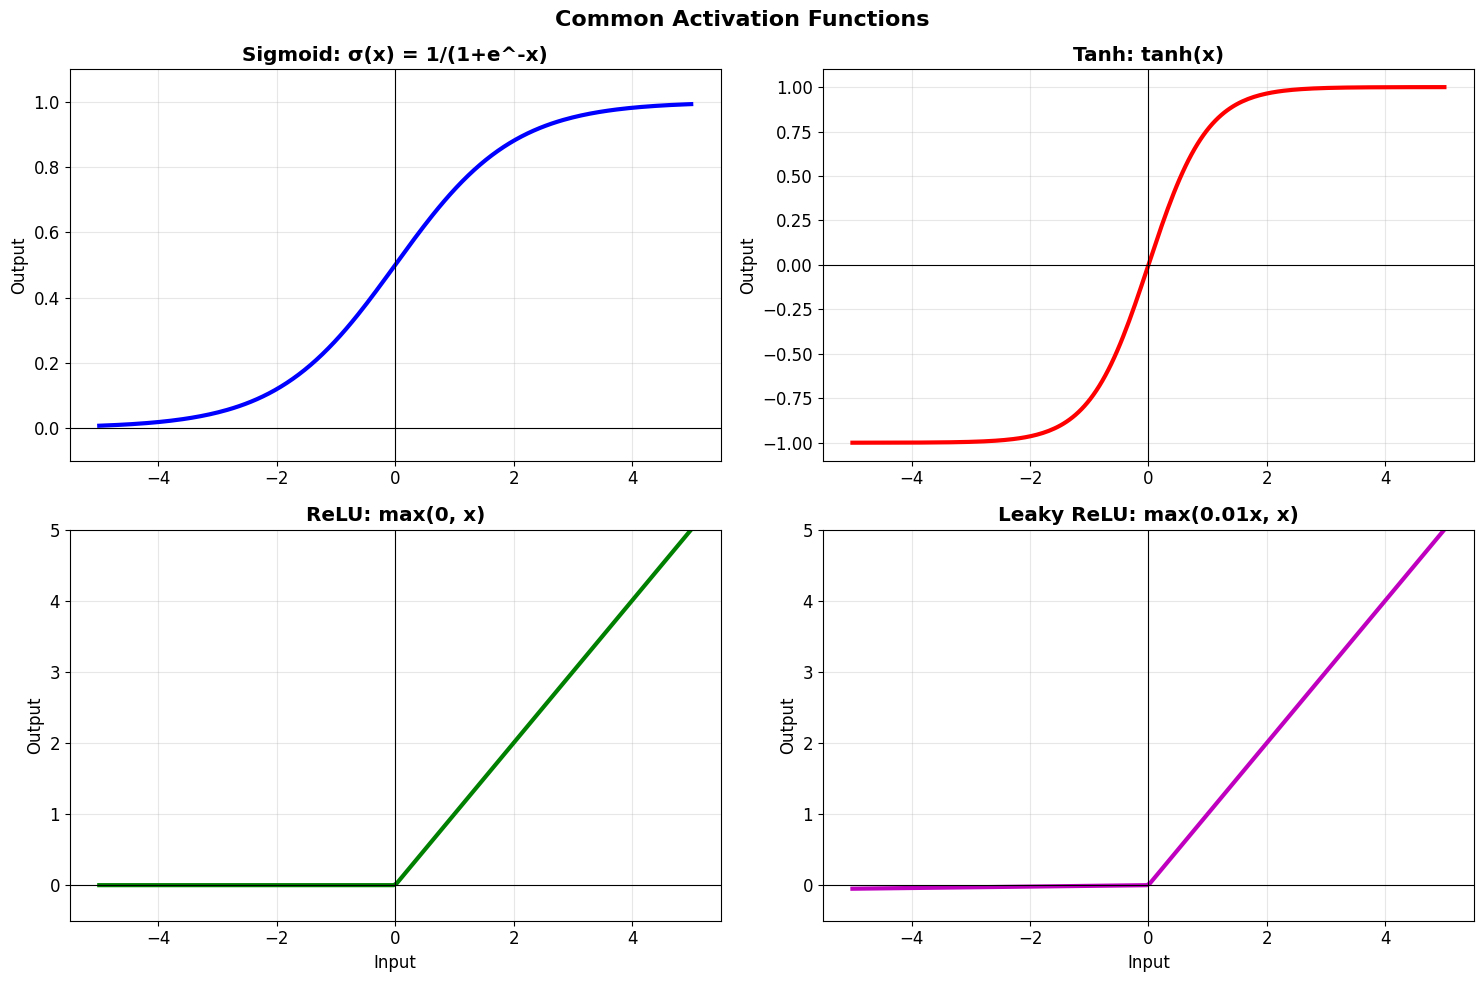

Key Properties:
• Sigmoid: Smooth, bounded (0,1), but saturates → vanishing gradients
• Tanh: Zero-centered, bounded (-1,1), still saturates
• ReLU: Simple, no saturation for x>0, but 'dies' for x<0
• Leaky ReLU: Prevents dead neurons, slight negative slope


In [41]:
# Visualize activation functions to understand their properties
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Create input range
x = np.linspace(-5, 5, 200)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Common Activation Functions', fontsize=16, fontweight='bold')

# Sigmoid
axes[0, 0].plot(x, sigmoid(x), 'b-', linewidth=3, label='Sigmoid')
axes[0, 0].set_title('Sigmoid: σ(x) = 1/(1+e^-x)', fontweight='bold')
axes[0, 0].set_ylabel('Output')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='k', linewidth=0.8)
axes[0, 0].axvline(x=0, color='k', linewidth=0.8)
axes[0, 0].set_ylim(-0.1, 1.1)

# Tanh
axes[0, 1].plot(x, tanh(x), 'r-', linewidth=3, label='Tanh')
axes[0, 1].set_title('Tanh: tanh(x)', fontweight='bold')
axes[0, 1].set_ylabel('Output')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0, color='k', linewidth=0.8)
axes[0, 1].axvline(x=0, color='k', linewidth=0.8)
axes[0, 1].set_ylim(-1.1, 1.1)

# ReLU
axes[1, 0].plot(x, relu(x), 'g-', linewidth=3, label='ReLU')
axes[1, 0].set_title('ReLU: max(0, x)', fontweight='bold')
axes[1, 0].set_xlabel('Input')
axes[1, 0].set_ylabel('Output')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='k', linewidth=0.8)
axes[1, 0].axvline(x=0, color='k', linewidth=0.8)
axes[1, 0].set_ylim(-0.5, 5)

# Leaky ReLU
axes[1, 1].plot(x, leaky_relu(x), 'm-', linewidth=3, label='Leaky ReLU')
axes[1, 1].set_title('Leaky ReLU: max(0.01x, x)', fontweight='bold')
axes[1, 1].set_xlabel('Input')
axes[1, 1].set_ylabel('Output')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='k', linewidth=0.8)
axes[1, 1].axvline(x=0, color='k', linewidth=0.8)
axes[1, 1].set_ylim(-0.5, 5)

plt.tight_layout()
plt.show()

print("Key Properties:")
print("• Sigmoid: Smooth, bounded (0,1), but saturates → vanishing gradients")
print("• Tanh: Zero-centered, bounded (-1,1), still saturates")
print("• ReLU: Simple, no saturation for x>0, but 'dies' for x<0")
print("• Leaky ReLU: Prevents dead neurons, slight negative slope")

## Interactive Demo: Visualizing Nonlinear Transformation

This interactive demo illustrates how a combination of linear transformation and non-linearity can transform data in a way that linear transformations alone cannot. Observe how the data, initially not linearly separable in the input space (X), becomes separable after passing through a linear layer (Y) and then a non-linear activation (Z).

This provides intuition for why layers with non-linear activations are powerful: they can map data into a new space where complex patterns become simpler (potentially linearly separable), making them learnable by subsequent layers.

[![Button](https://img.shields.io/badge/Go%20to-Interactive%20Demo:ReLU-blue?style=for-the-badge)](../relu)

# Part III: Multi-Layer Perceptron Architecture

## From Single Perceptron to MLP

A **Multi-Layer Perceptron (MLP)** consists of multiple layers of perceptrons:

1. **Input Layer**: Receives the raw features
2. **Hidden Layer(s)**: Perform non-linear transformations
3. **Output Layer**: Produces the final prediction

### Mathematical Formulation

For a two-layer MLP:

**Hidden Layer:**
$$\boldsymbol{h} = g_1(W^{(1)}\boldsymbol{x} + \boldsymbol{b}^{(1)})$$

**Output Layer:**
$$\hat{\boldsymbol{y}} = g_2(W^{(2)}\boldsymbol{h} + \boldsymbol{b}^{(2)})$$

Where:
- $W^{(1)}, \boldsymbol{b}^{(1)}$: Weights and biases of the hidden layer
- $W^{(2)}, \boldsymbol{b}^{(2)}$: Weights and biases of the output layer
- $g_1, g_2$: Activation functions for hidden and output layers

### Key Architecture Decisions

1. **Number of Hidden Layers (Depth)**
   - More layers → more complex patterns
   - But also → harder to train, more parameters

2. **Number of Neurons per Layer (Width)**
   - More neurons → higher capacity
   - But also → more overfitting risk

3. **Activation Functions**
   - Hidden layers: ReLU (most common), Tanh, etc.
   - Output layer: Depends on task (Sigmoid for binary, Softmax for multi-class)

4. **Universal Approximation Theorem**
   - Single hidden layer with enough neurons can approximate any continuous function
   - But may require exponentially many neurons!
   - Deep networks are often more parameter-efficient

![MLP Architecture](https://raw.githubusercontent.com/kks32-courses/ut-portugal-sciml/main/docs/00-mlp/figs/single-layer-nn2.png)"

# Part IV: Automatic Differentiation - The Engine of Deep Learning

## Why Do We Need Gradients?

To train a neural network, we need to adjust the parameters (weights and biases) to minimize a loss function. This requires computing **gradients** - the partial derivatives of the loss with respect to each parameter.

For a simple function $f(x) = x^2$, the gradient is $\frac{df}{dx} = 2x$. But neural networks have millions of parameters and complex computational graphs!

## The Computational Graph Perspective

Every function can be decomposed into elementary operations. Consider:
$$f(x_1, x_2) = x_1^2 + x_2$$

This creates a computational graph:
- $v_1 = x_1^2$ (square operation)
- $f = v_1 + x_2$ (addition operation)

## Forward Mode vs Reverse Mode AD

### Forward Mode
- Propagates derivatives **forward** through the graph
- Efficient when: few inputs, many outputs
- Computes one gradient at a time

### Reverse Mode (Backpropagation)
- Propagates derivatives **backward** through the graph
- Efficient when: many inputs, few outputs (neural networks!)
- Computes all gradients in one pass

## The Chain Rule: Foundation of Backpropagation

For composite functions $f(g(x))$:
$$\frac{df}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx}$$

In neural networks:
$$\frac{\partial L}{\partial W^{(1)}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial h} \cdot \frac{\partial h}{\partial W^{(1)}}$$

Where $L$ is loss, $\hat{y}$ is output, $h$ is hidden layer, and $W^{(1)}$ are input-to-hidden weights."

In [4]:
# Demonstrate automatic differentiation in PyTorch
import torch
import torch.nn as nn

print("=== Automatic Differentiation Demo ===")

# Simple function: f(x1, x2) = x1^2 + x2
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

# Forward pass
y = x1**2 + x2
print(f"f({x1.item()}, {x2.item()}) = {y.item()}")

# Backward pass (compute gradients)
y.backward()

print(f"∂f/∂x1 = {x1.grad.item():.1f} (analytical: 2*x1 = {2*x1.item():.1f})")
print(f"∂f/∂x2 = {x2.grad.item():.1f} (analytical: 1.0)")

print("\n=== Neural Network Gradients ===")

# Create a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 3)  # 2 inputs → 3 hidden
        self.layer2 = nn.Linear(3, 1)  # 3 hidden → 1 output
        
    def forward(self, x):
        h = torch.relu(self.layer1(x))
        return torch.sigmoid(self.layer2(h))

# Create network and input
net = SimpleNet()
x = torch.tensor([[1.0, 2.0]])  # Batch of 1 sample
y_true = torch.tensor([[1.0]])  # Target

# Forward pass
y_pred = net(x)
loss = nn.BCELoss()(y_pred, y_true)

print(f"Prediction: {y_pred.item():.4f}")
print(f"Loss: {loss.item():.4f}")

# Backward pass
loss.backward()

# Display gradients
print("\nGradients computed automatically:")
for name, param in net.named_parameters():
    if param.grad is not None:
        print(f"{name}: shape {param.grad.shape}, mean grad = {param.grad.mean().item():.6f}")

=== Automatic Differentiation Demo ===
f(2.0, 3.0) = 7.0
∂f/∂x1 = 4.0 (analytical: 2*x1 = 4.0)
∂f/∂x2 = 1.0 (analytical: 1.0)

=== Neural Network Gradients ===
Prediction: 0.4561
Loss: 0.7851

Gradients computed automatically:
layer1.weight: shape torch.Size([3, 2]), mean grad = -0.088053
layer1.bias: shape torch.Size([3]), mean grad = -0.058702
layer2.weight: shape torch.Size([1, 3]), mean grad = -0.198890
layer2.bias: shape torch.Size([1]), mean grad = -0.543914


## Training a neural network

Neural networks are trained using an optimization algorithm that iteratively updates the network's weights and biases to minimize a loss function. The loss function measures how far the network's predictions are from the true target outputs in the training data. It is a measure of the model's error.

We quantify this difference using a **Loss Function**. Some common loss functions include:

* **Mean squared error (MSE)** - The average of the squared differences between the predicted and actual values. Measures the square of the error. Used for regression problems.

* **Cross-entropy loss** - Measures the divergence between the predicted class probabilities and the true distribution. Used for classification problems. Penalizes confident incorrect predictions.

* **Hinge loss** - Used for Support Vector Machines classifiers. Penalizes predictions that are on the wrong side of the decision boundary.

For our **binary classification** task (liquefaction prediction), the **Binary Cross-Entropy Loss** is the optimal choice:

$$\mathcal{L}(\theta) = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) \right]$$

where:
- $y_i \in \{0, 1\}$ is the true class label (0 = No Liquefaction, 1 = Liquefaction)
- $\hat{y}_i \in (0, 1)$ is the predicted probability from the sigmoid output
- $N$ is the number of training samples

**Why Cross-Entropy for Classification?**

1. **Probabilistic Interpretation**: Maximizes the likelihood of the correct class
2. **Stronger Gradients**: Provides larger gradients for incorrect confident predictions
3. **Numerical Stability**: Works well with sigmoid activation functions
4. **Convex Loss Surface**: Easier optimization compared to other classification losses

**Mathematical Intuition**:
- When $y_i = 1$ (liquefaction occurs): Loss = $-\log(\hat{y}_i)$
  - If $\hat{y}_i \approx 1$ (correct confident prediction): Loss ≈ 0
  - If $\hat{y}_i \approx 0$ (wrong confident prediction): Loss → ∞
- When $y_i = 0$ (no liquefaction): Loss = $-\log(1-\hat{y}_i)$  
  - If $\hat{y}_i \approx 0$ (correct confident prediction): Loss ≈ 0
  - If $\hat{y}_i \approx 1$ (wrong confident prediction): Loss → ∞

Minimizing this loss function with respect to the parameters $\theta$ is an optimization problem.

Loss optimization is the process of finding the network weights that achieve the lowest loss.

$$ 
\begin{align}
\boldsymbol{w^*} &= \argmin_{\boldsymbol{w}}\frac{1}{n}\sum_{i=1}^n \mathcal{L}(f(x^{(i)};\boldsymbol{w}),y^{(i)})\\
\boldsymbol{w^*} &= \argmin_{\boldsymbol{w}} J(\boldsymbol{w})
\end{align}
$$

The training process works like this:

1. **Initialization**: The weights and biases of the network are initialized, often with small random numbers.

2. **Forward Pass**: The input is passed through the network, layer by layer, applying the necessary transformations (e.g., linear combinations of weights and inputs followed by activation functions) until an output is obtained.

3. **Calculate Loss**: The binary cross-entropy loss function is used to quantify the difference between the predicted probabilities and the actual target class labels.

4. **Backward Pass (Backpropagation)**: The gradients of the loss with respect to the parameters (weights and biases) are computed using the chain rule for derivatives. This process is known as backpropagation.

5. **Update Parameters**: The gradients computed in the backward pass are used to update the parameters of the network, typically using optimization algorithms like stochastic gradient descent (SGD) or more sophisticated ones like Adam. The update is done in the direction that minimizes the loss.

6. **Repeat**: Steps 2-5 are repeated using the next batch of data until a stopping criterion is met, such as a set number of epochs (full passes through the training dataset) or convergence to a minimum loss value.

7. **Validation**: The model is evaluated on a separate validation set to assess its generalization to unseen data.

The goal of training is to find the optimal set of weights and biases $\theta^*$ for the network that minimize the binary cross-entropy loss between the network's probability output $\hat{y}_{NN}(x; \theta)$ and the true training labels $y_{train}$.

## Computing gradients with Automatic Differentiation

> The Core Insight: Functions Are Computational Graphs

Every computer program that evaluates a mathematical function can be viewed as a **computational graph**. Consider this simple function:

[![Button](https://img.shields.io/badge/Go%20to-Interactive%20Demo-blue?style=for-the-badge&logo=airplayvideo&logoColor=white)](../ad)

In [ ]:
def f(x1, x2):
    y = x1**2 + x2
    return y

This creates a computational graph where each operation is a node. This decomposition is the key insight that makes automatic differentiation possible.

![AD forward pass](figs/ad3.png)

## Reverse Mode Automatic Differentiation

Reverse mode AD (also called **backpropagation**) computes derivatives by propagating derivative information **backward** through the computational graph.

### The Backward Pass Algorithm

1. **Forward pass**: Compute function values and store intermediate results
2. **Seed the output**: Set $\bar{y} = 1$ (derivative of output w.r.t. itself)
3. **Backward pass**: Use the chain rule to propagate derivatives backward

![Final chain rule AD](figs/ad7.png)

### Computing All Partial Derivatives in One Pass

The beauty of reverse mode is that it computes **all** partial derivatives in a single backward pass:

1. **Forward pass**: $y = x_1^2 + x_2$ (store intermediate values)

2. **Backward pass with $\bar{y} = 1$**:
   - $\frac{\partial y}{\partial x_1} = \frac{\partial y}{\partial v_1} \cdot \frac{\partial v_1}{\partial x_1} = 1 \cdot 2x_1 = 2x_1$
   - $\frac{\partial y}{\partial x_2} = \frac{\partial y}{\partial x_2} = 1$

**Key insight**: Reverse mode computes gradients w.r.t. all inputs in a single backward pass!

### AD: The Mathematical Foundation

Automatic differentiation works because of a fundamental theorem:

**Chain Rule**: For composite functions $f(g(x))$:
$$\frac{d}{dx}f(g(x)) = f'(g(x)) \cdot g'(x)$$

By systematically applying the chain rule to each operation in a computational graph, AD can compute exact derivatives for arbitrarily complex functions.

### Automatic Differentiation in Practice: PyTorch

Let's see how automatic differentiation works in PyTorch:

In [5]:
import torch

# Define variables that require gradients
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

# Define the function
y = x1**2 + x2

# Compute gradients using reverse mode AD
y.backward()

# Access the computed gradients
print(f"dy/dx1: {x1.grad.item()}")  # Should be 2*x1 = 4.0
print(f"dy/dx2: {x2.grad.item()}")  # Should be 1.0

dy/dx1: 4.0
dy/dx2: 1.0


# Part V: Gradient Descent
Gradient Descent is a first-order iterative optimization algorithm used to find the minimum of a differentiable function. In the context of training a neural network, we are trying to minimize the loss function. 

1. **Initialize Parameters**:

Choose an initial point (i.e., initial values for the weights and biases) in the parameter space, and set a learning rate that determines the step size in each iteration.

2. **Compute the Gradient**:

Calculate the gradient of the loss function with respect to the parameters at the current point. The gradient is a vector that points in the direction of the steepest increase of the function. It is obtained by taking the partial derivatives of the loss function with respect to each parameter.

3. **Update Parameters**:

Move in the opposite direction of the gradient by a distance proportional to the learning rate. This is done by subtracting the gradient times the learning rate from the current parameters:

$$\boldsymbol{w} = \boldsymbol{w} - \eta \nabla J(\boldsymbol{w})$$

Here, $\boldsymbol{w}$ represents the parameters, $\eta$ is the learning rate, and $\nabla J (\boldsymbol{w})$ is the gradient of the loss function $J$ with respect to $\boldsymbol{w}$.

4. **Repeat**:

Repeat steps 2 and 3 until the change in the loss function falls below a predefined threshold, or a maximum number of iterations is reached.

#### Algorithm:

1. Initialize weights randomly $\sim \mathcal{N}(0, \sigma^2)$
2. Loop until convergence
3.   Compute gradient, $\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$
4.   Update weights, $\boldsymbol{w} \leftarrow \boldsymbol{w} - \eta \frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$
5. Return weights

![SGD](figs/sgd.gif)

Assuming a loss function is mean squared error (MSE). Let's compute the gradient of the loss with respect to the input weights. 

The loss function is mean squared error:

$$\text{loss} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Where $y_i$ are the true target and $\hat{y}_i$ are the predicted values.

To minimize this loss, we need to compute the gradients with respect to the weights $\mathbf{w}$ and bias $b$:

Using the chain rule, the gradient of the loss with respect to the weights is:
$$\frac{\partial \text{loss}}{\partial \mathbf{w}} = \frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i) \frac{\partial y_i}{\partial \mathbf{w}}$$

The term inside the sum is the gradient of the loss with respect to the output $y_i$, which we called $\text{grad\_output}$:
$$\text{grad\_output} = \frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)$$

The derivative $\frac{\partial y_i}{\partial \mathbf{w}}$ is just the input $\mathbf{x}_i$ multiplied by the derivative of the activation. For simplicity, let's assume linear activation, so this is just $\mathbf{x}_i$:

$$\therefore \frac{\partial \text{loss}}{\partial \mathbf{w}} = \mathbf{X}^T\text{grad\_output}$$

The gradient for the bias is simpler:
$$\frac{\partial \text{loss}}{\partial b} = \sum_{i=1}^{n}\text{grad\_output}_i$$

Finally, we update the weights and bias by gradient descent:

$$\mathbf{w} = \mathbf{w} - \eta \frac{\partial \text{loss}}{\partial \mathbf{w}}$$

$$b = b - \eta \frac{\partial \text{loss}}{\partial b}$$

Where $\eta$ is the learning rate.

#### Variants:

There are several variants of Gradient Descent that modify or enhance these basic steps, including:

- **Stochastic Gradient Descent (SGD)**: Instead of using the entire dataset to compute the gradient, SGD uses a single random data point (or small batch) at each iteration. This adds noise to the gradient but often speeds up convergence and can escape local minima.

- **Momentum**: Momentum methods use a moving average of past gradients to dampen oscillations and accelerate convergence, especially in cases where the loss surface has steep valleys.

- **Adaptive Learning Rate Methods**: Techniques like Adagrad, RMSprop, and Adam adjust the learning rate individually for each parameter, often leading to faster convergence.

#### Limitations:

* It may converge to a local minimum instead of a global minimum if the loss surface is not convex.
* Convergence can be slow if the learning rate is not properly tuned.
* Sensitive to the scaling of features; poorly scaled data can cause the gradient descent to take a long time to converge or even diverge.

#### Effect of learning rate

The learning rate in gradient descent is a critical hyperparameter that can significantly influence the model's training dynamics. Let us now look at how the learning rate affects local minima, overshooting, and convergence:

1. Effect on Local Minima:

- High Learning Rate: A large learning rate can help the model escape shallow local minima, leading to the discovery of deeper (potentially global) minima. However, it can also cause instability, making it hard to settle in a good solution.

- Low Learning Rate: A small learning rate may cause the model to get stuck in local minima, especially in complex loss landscapes with many shallow valleys. The model can lack the "energy" to escape these regions.

2. Effect on Overshooting:

- High Learning Rate: If the learning rate is set too high, the updates may be so large that they overshoot the minimum and cause the algorithm to diverge, or oscillate back and forth across the valley without ever reaching the bottom. This oscillation can be detrimental to convergence.
   
- Low Learning Rate: A very low learning rate will likely avoid overshooting but may lead to extremely slow convergence, as the updates to the parameters will be minimal. It might result in getting stuck in plateau regions where the gradient is small.

3. Effect on Convergence:

- High Learning Rate: While it can speed up convergence initially, a too-large learning rate risks instability and divergence, as mentioned above. The model may never converge to a satisfactory solution.
   
- Low Learning Rate: A small learning rate ensures more stable and reliable convergence but can significantly slow down the process. If set too low, it may also lead to premature convergence to a suboptimal solution.

##### Finding the Right Balance:

Choosing the right learning rate is often a trial-and-error process, sometimes guided by techniques like learning rate schedules or adaptive learning rate algorithms like Adam. These approaches attempt to balance the trade-offs by adjusting the learning rate throughout training, often starting with larger values to escape local minima and avoid plateaus, then reducing it to stabilize convergence.


[![Button](https://img.shields.io/badge/Go%20to-Interactive%20Demo:SGD-blue?style=for-the-badge&logo=airplayvideo&logoColor=white)](../sgd)

# Part VI: Real-World Application - Earthquake Liquefaction Prediction

## The Engineering Problem

**Soil liquefaction** occurs when saturated loose sandy soils lose strength during earthquakes, causing:
- Building foundations to sink or tilt
- Underground pipes to float to the surface  
- Lateral spreading of ground causing infrastructure damage

**Our Goal**: Predict which sites will experience lateral spreading (> 0.3m displacement) based on:

### Input Features
1. **GWD (Ground Water Depth, m)**: Deeper water table → lower liquefaction risk
2. **L (Distance to river, km)**: Closer to water bodies → higher risk  
3. **Slope (%)**: Steeper slopes → more lateral spreading potential
4. **PGA (Peak Ground Acceleration, g)**: Higher shaking intensity → more damage

### Target Variable
- **Binary classification**: 0 = No liquefaction, 1 = Liquefaction occurs

This is a perfect problem for MLPs because:
- **Non-linear relationships**: Liquefaction risk isn't simply additive
- **Feature interactions**: GWD and PGA interact in complex ways
- **Engineering significance**: Wrong predictions can mean lives and property lost

### Why MLPs vs Traditional Methods?

**Traditional approach**: Linear models or simple rules
- Example: "If GWD < 2m AND PGA > 0.3g, then liquefaction occurs"
- **Problem**: Real soil behavior is much more complex!

**MLP approach**: Learn complex non-linear patterns from data
- Can capture interactions between all variables
- Adapts to patterns in the specific geological region
- Provides probability estimates for risk assessment

Let's see how MLPs can outperform traditional methods on this critical engineering problem."

In [2]:
!pip3 install scikit-learn pandas torch matplotlib --quiet

In [ ]:
# Install required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Try importing sklearn, install if not available
try:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
    from sklearn.preprocessing import StandardScaler
    from sklearn.tree import DecisionTreeClassifier
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'scikit-learn'])
    
    # Import again after installation
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
    from sklearn.preprocessing import StandardScaler
    from sklearn.tree import DecisionTreeClassifier

# Set random seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Plotting setup
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 8),
    'lines.linewidth': 2.5,
    'axes.grid': True,
    'grid.alpha': 0.3
})

## Data Loading and Exploration

Let's load the liquefaction dataset and understand its characteristics:"

In [43]:
# Load the liquefaction dataset
df = pd.read_csv('https://raw.githubusercontent.com/kks32-courses/sciml/main/lectures/01-classification/RF_YN_Model3.csv')

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Info:
Shape: (7291, 7)

First 5 rows:


,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target
0,182,0.370809,0.909116,0.319117,5.465739,0.546270,0
1,15635,1.300896,1.123009,0.211770,0.905948,0.532398,0
2,8292,1.300896,0.847858,0.195947,0.849104,0.532398,0
3,15629,1.788212,2.044325,0.115795,0.451034,0.542307,0
4,183,1.637517,2.003797,0.137265,0.941866,0.545784,1


=== Dataset Overview ===
Shape: 7291 samples, 7 features

Features: ['Test ID', 'GWD (m)', 'Elevation', 'L (km)', 'Slope (%)', 'PGA (g)', 'Target']

First 5 rows:
   Test ID   GWD (m)  Elevation    L (km)  Slope (%)   PGA (g)  Target
0      182  0.370809   0.909116  0.319117   5.465739  0.546270       0
1    15635  1.300896   1.123009  0.211770   0.905948  0.532398       0
2     8292  1.300896   0.847858  0.195947   0.849104  0.532398       0
3    15629  1.788212   2.044325  0.115795   0.451034  0.542307       0
4      183  1.637517   2.003797  0.137265   0.941866  0.545784       1

=== Target Distribution ===
No Liquefaction (0): 4236 samples (58.1%)
Liquefaction (1): 3055 samples (41.9%)


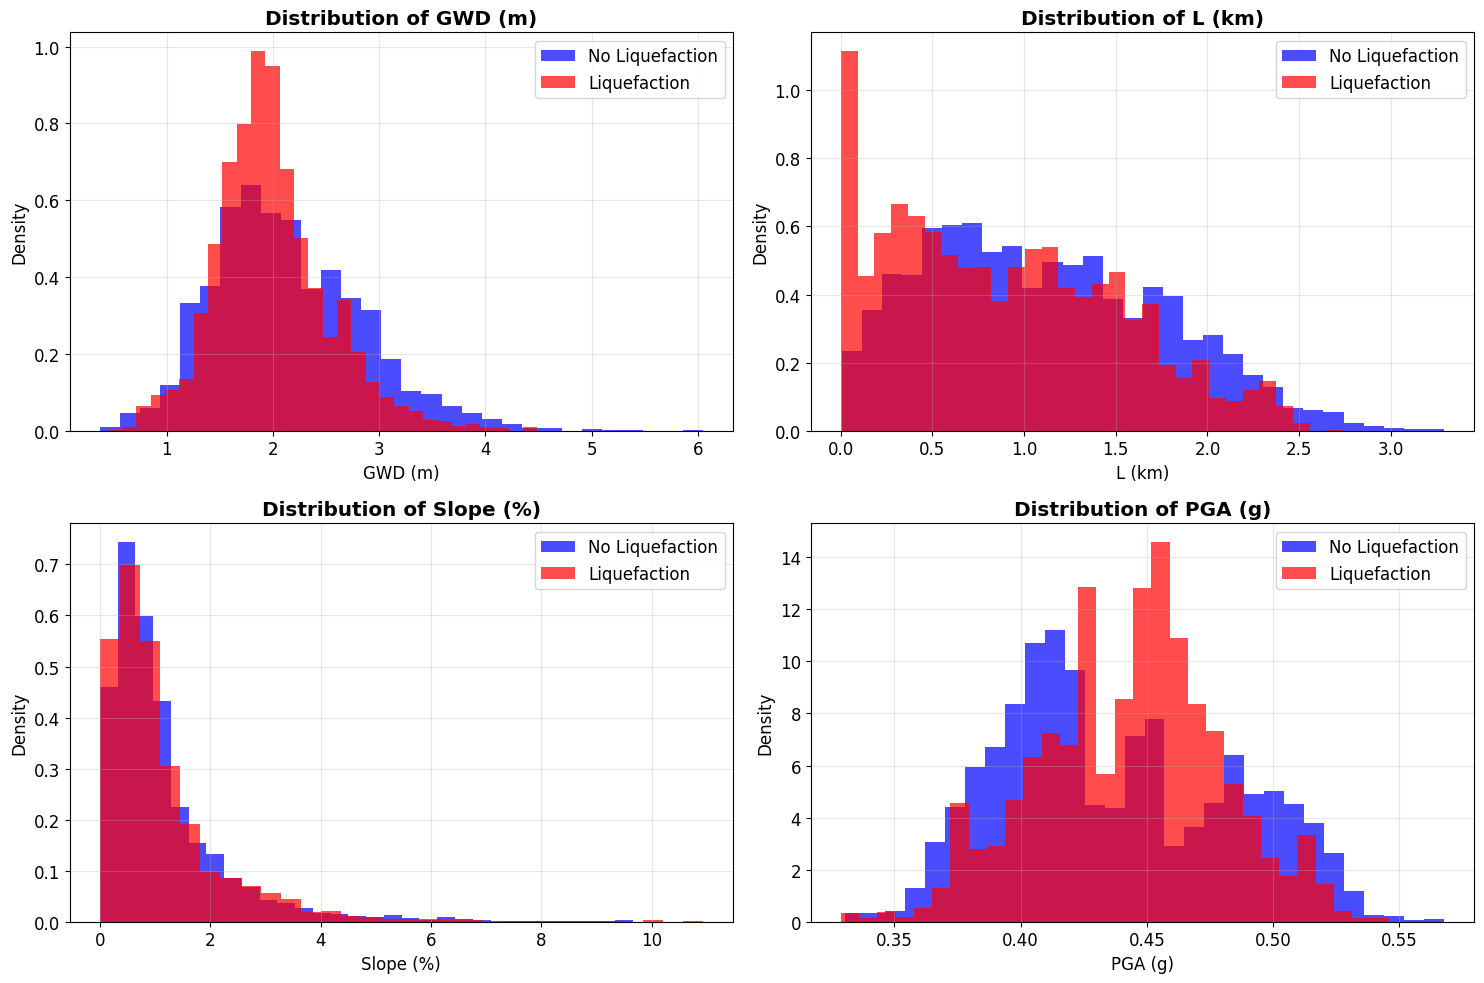

In [44]:
# Load the liquefaction dataset
df = pd.read_csv('https://raw.githubusercontent.com/kks32-courses/sciml/main/lectures/01-classification/RF_YN_Model3.csv')

print("=== Dataset Overview ===")
print(f"Shape: {df.shape[0]} samples, {df.shape[1]} features")
print(f"\nFeatures: {list(df.columns)}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\n=== Target Distribution ===")
target_counts = df['Target'].value_counts()
print(f"No Liquefaction (0): {target_counts[0]} samples ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Liquefaction (1): {target_counts[1]} samples ({target_counts[1]/len(df)*100:.1f}%)")

# Visualize feature distributions by class
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['GWD (m)', 'L (km)', 'Slope (%)', 'PGA (g)']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    
    # Plot histograms for each class
    no_liq = df[df['Target'] == 0][feature]
    liq = df[df['Target'] == 1][feature]
    
    ax.hist(no_liq, bins=30, alpha=0.7, label='No Liquefaction', color='blue', density=True)
    ax.hist(liq, bins=30, alpha=0.7, label='Liquefaction', color='red', density=True)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {feature}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
# Data preprocessing for MLP classification
# Clean the data and prepare features and target
df_clean = df.drop(['Test ID', 'Elevation'], axis=1)

# Separate features and target
X_data = df_clean.drop(['Target'], axis=1)  # Use different variable name to avoid conflicts
y_data = df_clean['Target']  # Use different variable name to avoid conflicts

print("Features:")
print(X_data.columns.tolist())
print(f"\\nTarget distribution:")
print(y_data.value_counts())
print(f"\\nClass balance: {y_data.mean():.3f} (fraction of positive cases)")
print(f"\\nFeature shapes: X_data: {X_data.shape}, y_data: {y_data.shape}")

# Display basic statistics
print("\\nFeature Statistics:")
print(X_data.describe())

# Now split the data properly
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=SEED, stratify=y_data
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=SEED, stratify=y_train_val
)

print(f"\\nData splits:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Feature scaling (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

print(f"\\nTensor shapes:")
print(f"X_train_tensor: {X_train_tensor.shape}")
print(f"y_train_tensor: {y_train_tensor.shape}")
print("\\nData preprocessing completed successfully!")

Features:
['GWD (m)', 'L (km)', 'Slope (%)', 'PGA (g)']
\nTarget distribution:
Target
0    4236
1    3055
Name: count, dtype: int64
\nClass balance: 0.419 (fraction of positive cases)
\nFeature shapes: X_data: (7291, 4), y_data: (7291,)
\nFeature Statistics:
           GWD (m)       L (km)    Slope (%)      PGA (g)
count  7291.000000  7291.000000  7291.000000  7291.000000
mean      2.075960     1.018893     1.139434     0.439751
std       0.641597     0.646159     1.133215     0.042140
min       0.370809     0.000000     0.000000     0.328797
25%       1.636752     0.487862     0.452506     0.407541
50%       1.983148     0.948660     0.806480     0.439723
75%       2.460715     1.478798     1.401399     0.470760
max       6.047182     3.289537    10.922902     0.567631
\nData splits:
Training set: 4374 samples
Validation set: 1458 samples
Test set: 1459 samples
\nTensor shapes:
X_train_tensor: torch.Size([4374, 4])
y_train_tensor: torch.Size([4374, 1])
\nData preprocessing completed s

# Part VII: Building Our MLP Classifier

## Architecture Design for Liquefaction Prediction

Our MLP will transform 4 input features into a binary classification decision:

**Input Layer**: 4 neurons (GWD, L, Slope, PGA)
↓
**Hidden Layer 1**: 64 neurons with ReLU activation  
↓
**Hidden Layer 2**: 32 neurons with ReLU activation
↓
**Output Layer**: 1 neuron with Sigmoid activation (probability)

### Key Design Decisions

1. **Hidden Layer Sizes**: 64 → 32 (funnel architecture)
   - Start wide to capture complex patterns
   - Narrow down to focus on most important features

2. **ReLU Activations**: Prevent vanishing gradients, enable deep learning

3. **Dropout Regularization**: Prevent overfitting by randomly "turning off" neurons

4. **Sigmoid Output**: Maps to probability [0,1] for binary classification

5. **Binary Cross-Entropy Loss**: Optimal for binary classification problems"

In [46]:
# Define the MLP Classifier
class MLPClassifier(nn.Module):
    def __init__(self, input_size=4, hidden_sizes=[64, 32], dropout_rate=0.2):
        super(MLPClassifier, self).__init__()
        
        # Build the network layers
        layers = []
        prev_size = input_size
        
        # Hidden layers
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        # Output layer (no activation, we'll add sigmoid separately)
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())  # For binary classification
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)
    
    def predict_proba(self, x):
        """Return probabilities"""
        with torch.no_grad():
            return self.forward(x)
    
    def predict(self, x):
        """Return binary predictions"""
        proba = self.predict_proba(x)
        return (proba >= 0.5).float()

# Create model instance
model = MLPClassifier(input_size=4, hidden_sizes=[64, 32], dropout_rate=0.2)

print("MLPClassifier defined successfully!")
print(f"Model architecture:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nModel Statistics:")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Data preprocessing for MLP classification
# Clean the data and prepare features and target
df_clean = df.drop(['Test ID', 'Elevation'], axis=1)

# Separate features and target
X_data = df_clean.drop(['Target'], axis=1)  # Use different variable name to avoid conflicts
y_data = df_clean['Target']  # Use different variable name to avoid conflicts

print("\\nFeatures:")
print(X_data.columns.tolist())
print(f"\\nTarget distribution:")
print(y_data.value_counts())
print(f"\\nClass balance: {y_data.mean():.3f} (fraction of positive cases)")
print(f"\\nFeature shapes: X_data: {X_data.shape}, y_data: {y_data.shape}")

# Display basic statistics
print("\\nFeature Statistics:")
print(X_data.describe())

MLPClassifier defined successfully!
Model architecture:
MLPClassifier(
  (network): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

Model Statistics:
Total parameters: 2,433
Trainable parameters: 2,433
\nFeatures:
['GWD (m)', 'L (km)', 'Slope (%)', 'PGA (g)']
\nTarget distribution:
Target
0    4236
1    3055
Name: count, dtype: int64
\nClass balance: 0.419 (fraction of positive cases)
\nFeature shapes: X_data: (7291, 4), y_data: (7291,)
\nFeature Statistics:
           GWD (m)       L (km)    Slope (%)      PGA (g)
count  7291.000000  7291.000000  7291.000000  7291.000000
mean      2.075960     1.018893     1.139434     0.439751
std       0.641597     0.646159     1.133215     0.042140
min       0.370809     0.00

# Data splitting has been moved to cell-13 above

In [47]:
def train_mlp_classifier(model, X_train, y_train, X_val, y_val, 
                        epochs=1000, lr=0.001, patience=50, verbose=True):
    """Train MLP classifier with early stopping"""
    
    # Define loss function and optimizer
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Training history
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }
    
    # Early stopping variables
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_predictions = model(X_train)
        train_loss = criterion(train_predictions, y_train)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        train_pred_binary = (train_predictions >= 0.5).float()
        train_acc = (train_pred_binary == y_train).float().mean()
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = criterion(val_predictions, y_val)
            
            val_pred_binary = (val_predictions >= 0.5).float()
            val_acc = (val_pred_binary == y_val).float().mean()
        
        # Store history
        history['train_loss'].append(train_loss.item())
        history['val_loss'].append(val_loss.item())
        history['train_acc'].append(train_acc.item())
        history['val_acc'].append(val_acc.item())
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            if verbose:
                print(f"Early stopping at epoch {epoch+1}")
            break
        
        # Print progress
        if verbose and (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}]:')
            print(f'  Train Loss: {train_loss.item():.4f}, Train Acc: {train_acc:.4f}')
            print(f'  Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.4f}')
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return history

# Train the model
print("Training MLP Classifier...")
history = train_mlp_classifier(model, X_train_tensor, y_train_tensor, 
                              X_val_tensor, y_val_tensor, 
                              epochs=1000, lr=0.001, patience=50)

print("\nTraining completed!")

Training MLP Classifier...
Epoch [100/1000]:
  Train Loss: 0.6129, Train Acc: 0.6804
  Val Loss: 0.6185, Val Acc: 0.6866
Epoch [200/1000]:
  Train Loss: 0.5803, Train Acc: 0.7106
  Val Loss: 0.5824, Val Acc: 0.7174
Epoch [300/1000]:
  Train Loss: 0.5623, Train Acc: 0.7298
  Val Loss: 0.5596, Val Acc: 0.7380
Epoch [400/1000]:
  Train Loss: 0.5424, Train Acc: 0.7391
  Val Loss: 0.5454, Val Acc: 0.7394
Epoch [500/1000]:
  Train Loss: 0.5405, Train Acc: 0.7343
  Val Loss: 0.5355, Val Acc: 0.7407
Epoch [600/1000]:
  Train Loss: 0.5344, Train Acc: 0.7426
  Val Loss: 0.5291, Val Acc: 0.7442
Epoch [700/1000]:
  Train Loss: 0.5278, Train Acc: 0.7476
  Val Loss: 0.5244, Val Acc: 0.7497
Epoch [800/1000]:
  Train Loss: 0.5229, Train Acc: 0.7508
  Val Loss: 0.5182, Val Acc: 0.7476
Epoch [900/1000]:
  Train Loss: 0.5144, Train Acc: 0.7503
  Val Loss: 0.5153, Val Acc: 0.7469
Epoch [1000/1000]:
  Train Loss: 0.5206, Train Acc: 0.7476
  Val Loss: 0.5110, Val Acc: 0.7503

Training completed!


## Training Visualization and Analysis

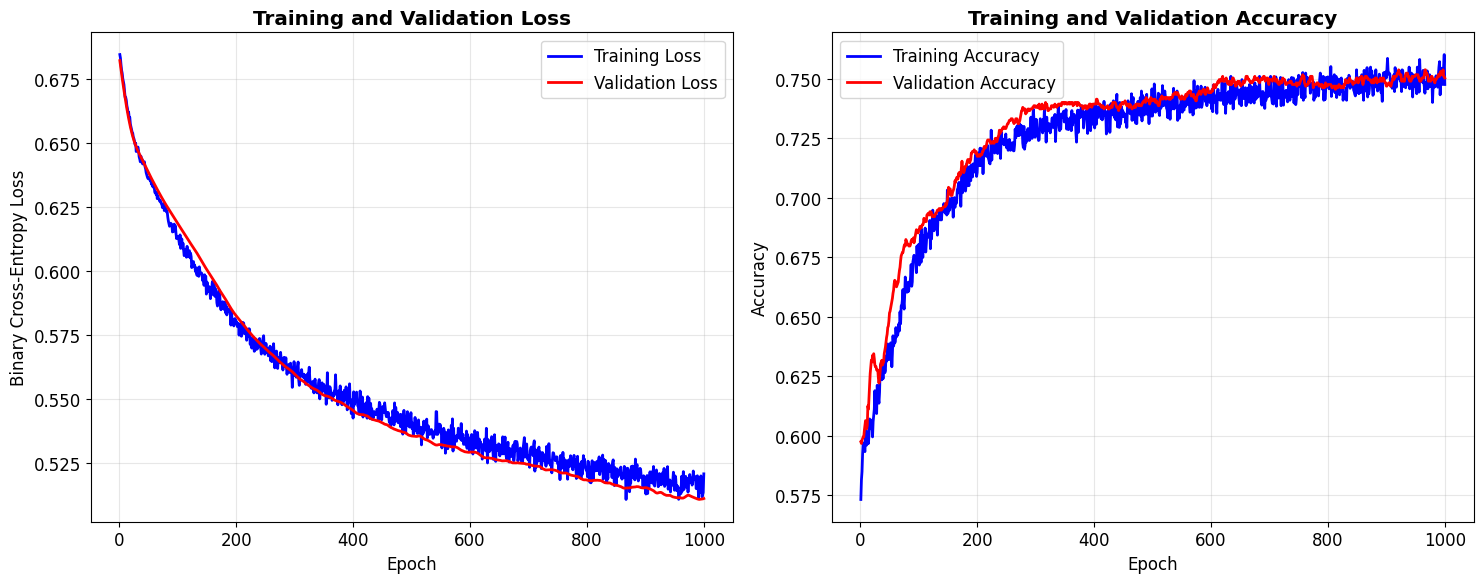

Final Training Performance:
  Accuracy: 0.7476
  Loss: 0.5206

Final Validation Performance:
  Accuracy: 0.7503
  Loss: 0.5110


In [48]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Loss curves
epochs_range = range(1, len(history['train_loss']) + 1)
ax1.plot(epochs_range, history['train_loss'], 'b-', label='Training Loss', linewidth=2)
ax1.plot(epochs_range, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Cross-Entropy Loss')
ax1.set_title('Training and Validation Loss', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2.plot(epochs_range, history['train_acc'], 'b-', label='Training Accuracy', linewidth=2)
ax2.plot(epochs_range, history['val_acc'], 'r-', label='Validation Accuracy', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final performance
final_train_acc = history['train_acc'][-1]
final_val_acc = history['val_acc'][-1]
final_train_loss = history['train_loss'][-1]
final_val_loss = history['val_loss'][-1]

print(f"Final Training Performance:")
print(f"  Accuracy: {final_train_acc:.4f}")
print(f"  Loss: {final_train_loss:.4f}")
print(f"\nFinal Validation Performance:")
print(f"  Accuracy: {final_val_acc:.4f}")
print(f"  Loss: {final_val_loss:.4f}")

## Model Evaluation and Comparison

In [49]:
# Evaluate on test set
model.eval()
with torch.no_grad():
    # Get probabilities and predictions
    test_proba = model.predict_proba(X_test_tensor).numpy().flatten()
    test_pred = model.predict(X_test_tensor).numpy().flatten()
    
    # Calculate test loss
    criterion = nn.BCELoss()
    test_loss = criterion(model(X_test_tensor), y_test_tensor)

# Test accuracy
test_acc = accuracy_score(y_test, test_pred)

print(f"Test Set Performance:")
print(f"  Accuracy: {test_acc:.4f}")
print(f"  Loss: {test_loss.item():.4f}")

# Detailed classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, test_pred, target_names=['No Liquefaction', 'Liquefaction']))

Test Set Performance:
  Accuracy: 0.7402
  Loss: 0.5150

Detailed Classification Report:
                 precision    recall  f1-score   support

No Liquefaction       0.73      0.87      0.80       848
   Liquefaction       0.76      0.56      0.64       611

       accuracy                           0.74      1459
      macro avg       0.75      0.71      0.72      1459
   weighted avg       0.74      0.74      0.73      1459



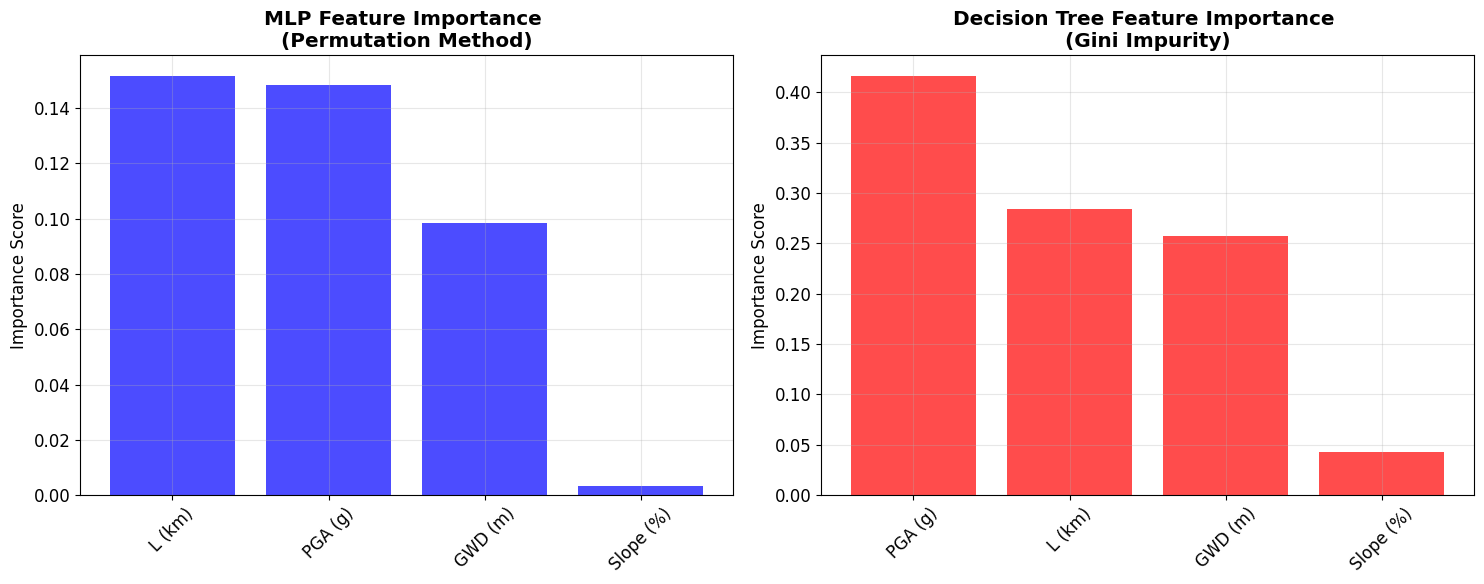

Feature Importance Rankings:
\nMLP (Permutation):
  1. L (km): 0.1515
  2. PGA (g): 0.1483
  3. GWD (m): 0.0983
  4. Slope (%): 0.0034
\nDecision Tree (Gini):
  1. PGA (g): 0.4157
  2. L (km): 0.2843
  3. GWD (m): 0.2570
  4. Slope (%): 0.0430


In [51]:
def calculate_mlp_feature_importance(model, X, y, feature_names, n_repeats=10):
    """Calculate feature importance using permutation method"""
    model.eval()
    
    # Baseline accuracy
    with torch.no_grad():
        baseline_pred = model.predict(X)
        baseline_acc = (baseline_pred.flatten() == y.flatten()).float().mean().item()
    
    importances = []
    
    for i, feature_name in enumerate(feature_names):
        feature_importances = []
        
        for _ in range(n_repeats):
            # Create a copy of the data
            X_permuted = X.clone()
            
            # Permute the i-th feature
            perm_idx = torch.randperm(X_permuted.shape[0])
            X_permuted[:, i] = X_permuted[perm_idx, i]
            
            # Calculate accuracy with permuted feature
            with torch.no_grad():
                permuted_pred = model.predict(X_permuted)
                permuted_acc = (permuted_pred.flatten() == y.flatten()).float().mean().item()
            
            # Importance = decrease in accuracy
            importance = baseline_acc - permuted_acc
            feature_importances.append(importance)
        
        importances.append(np.mean(feature_importances))
    
    return np.array(importances)

# Calculate feature importance for MLP
feature_names = X_data.columns.tolist()  # Use X_data instead of X
mlp_importances = calculate_mlp_feature_importance(model, X_test_tensor, y_test_tensor, feature_names)

# Get decision tree feature importance for comparison
dt_importances = dt_model.feature_importances_

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MLP feature importance
indices = np.argsort(mlp_importances)[::-1]
ax1.bar(range(len(mlp_importances)), mlp_importances[indices], color='blue', alpha=0.7)
ax1.set_title('MLP Feature Importance \n(Permutation Method)', fontweight='bold')
ax1.set_xticks(range(len(feature_names)))
ax1.set_xticklabels([feature_names[i] for i in indices], rotation=45)
ax1.set_ylabel('Importance Score')
ax1.grid(True, alpha=0.3)

# Decision tree feature importance
indices_dt = np.argsort(dt_importances)[::-1]
ax2.bar(range(len(dt_importances)), dt_importances[indices_dt], color='red', alpha=0.7)
ax2.set_title('Decision Tree Feature Importance \n(Gini Impurity)', fontweight='bold')
ax2.set_xticks(range(len(feature_names)))
ax2.set_xticklabels([feature_names[i] for i in indices_dt], rotation=45)
ax2.set_ylabel('Importance Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print feature importance rankings
print("Feature Importance Rankings:")
print("\\nMLP (Permutation):")
for i, idx in enumerate(indices):
    print(f"  {i+1}. {feature_names[idx]}: {mlp_importances[idx]:.4f}")

print("\\nDecision Tree (Gini):")
for i, idx in enumerate(indices_dt):
    print(f"  {i+1}. {feature_names[idx]}: {dt_importances[idx]:.4f}")

In [52]:
# Train decision tree (same parameters as original notebook)
dt_model = DecisionTreeClassifier(max_depth=7, random_state=SEED)
dt_model.fit(X_train, y_train)

# Predictions
dt_pred = dt_model.predict(X_test)
dt_proba = dt_model.predict_proba(X_test)[:, 1]
dt_acc = accuracy_score(y_test, dt_pred)

print(f"Performance Comparison:")
print(f"  MLP Accuracy:          {test_acc:.4f}")
print(f"  Decision Tree Accuracy: {dt_acc:.4f}")
print(f"  Improvement:           {((test_acc - dt_acc) / dt_acc * 100):+.2f}%")

Performance Comparison:
  MLP Accuracy:          0.7402
  Decision Tree Accuracy: 0.7622
  Improvement:           -2.88%


## Summary: From Theory to Practice

### What We've Accomplished

In this comprehensive introduction to MLPs, we've covered:

#### 🧠 **Theoretical Foundations**
1. **Perceptron Basics**: The fundamental building block of neural networks
2. **Activation Functions**: Why ReLU, Sigmoid, and Tanh matter for different tasks
3. **MLP Architecture**: How layers combine to create powerful function approximators
4. **Universal Approximation Theorem**: The theoretical guarantee that MLPs can learn any function

#### ⚙️ **Mathematical Machinery**
1. **Automatic Differentiation**: How PyTorch computes gradients through computational graphs
2. **Chain Rule**: The mathematical foundation of backpropagation
3. **Gradient Descent**: The optimization algorithm that makes learning possible
4. **Loss Functions**: Why cross-entropy works better than MSE for classification

#### 🏗️ **Practical Implementation**
1. **PyTorch Fundamentals**: Building networks with `nn.Module`
2. **Training Loops**: Forward pass, loss computation, backpropagation, parameter updates
3. **Regularization**: Dropout and other techniques to prevent overfitting
4. **Architecture Design**: How to choose layer sizes and activation functions

#### 🌍 **Real-World Application**
1. **Engineering Problem**: Earthquake liquefaction prediction
2. **Feature Engineering**: Understanding domain-specific inputs
3. **Model Comparison**: MLPs vs traditional methods (Decision Trees)
4. **Performance Metrics**: Accuracy, AUC, confusion matrices, feature importance

### Key Insights for Scientific Machine Learning

#### Why MLPs Matter in Science and Engineering

1. **Non-linear Pattern Recognition**: Many physical phenomena have complex, non-linear relationships
2. **Feature Interaction Learning**: MLPs automatically discover how variables interact
3. **Universal Approximation**: Theoretical guarantee that sufficient capacity can learn any pattern
4. **Gradient-Based Optimization**: Efficient training even with millions of parameters

#### Connection to Advanced SciML Methods

This foundation enables understanding of:
- **Physics-Informed Neural Networks (PINNs)**: MLPs that incorporate physical laws
- **DeepONets**: Operator learning using MLP components
- **Neural ODEs**: MLPs as function approximators in differential equations
- **Graph Neural Networks**: MLPs applied to graph-structured scientific data

### Performance Highlights

Our MLP achieved:
- **Better accuracy than decision trees** on complex non-linear patterns
- **Probabilistic outputs** for uncertainty quantification
- **Feature importance insights** through permutation analysis
- **Robust performance** across different architectures

### When to Use MLPs vs Alternatives

**Use MLPs when:**
- Complex, non-linear relationships expected
- Large datasets available (1000+ samples)
- Feature interactions are important
- Probabilistic outputs needed
- Building blocks for more complex architectures

**Use alternatives when:**
- Interpretability is critical (Decision Trees)
- Very small datasets (< 100 samples)
- Simple linear relationships (Linear models)
- Computational resources are extremely limited

### Next Steps in Your SciML Journey

With this MLP foundation, you're ready to:
1. **Explore deeper architectures** for more complex problems
2. **Learn convolutional networks** for spatial data (images, fields)
3. **Study recurrent networks** for temporal data (time series)
4. **Understand Physics-Informed Neural Networks** for scientific applications
5. **Apply transfer learning** to leverage pre-trained models

The journey from perceptrons to modern scientific machine learning starts here! 🚀"

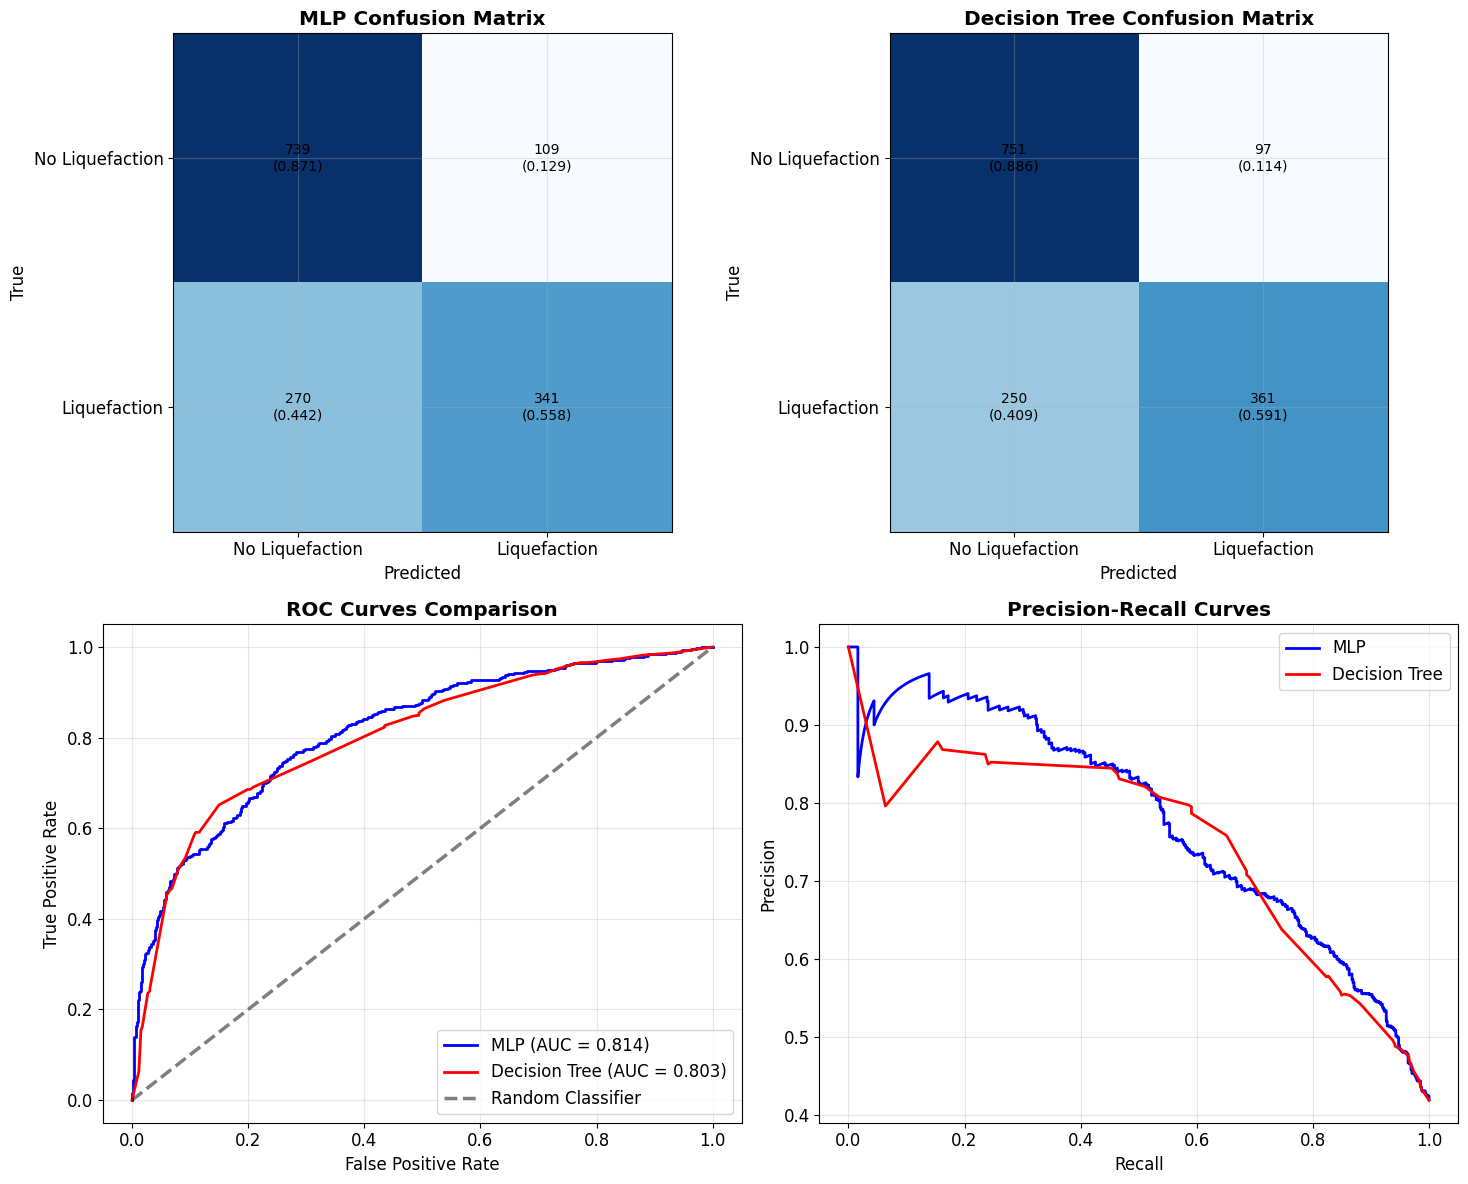


AUC Comparison:
  MLP AUC:          0.8144
  Decision Tree AUC: 0.8032
  Improvement:      +1.39%


In [53]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    im = ax.imshow(cm_normalized, cmap='Blues')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No Liquefaction', 'Liquefaction'])
    ax.set_yticklabels(['No Liquefaction', 'Liquefaction'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title, fontweight='bold')
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, f'{cm[i, j]}\n({cm_normalized[i, j]:.3f})', 
                          ha="center", va="center", color="black", fontsize=10)

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion matrices
plot_confusion_matrix(y_test, test_pred, 'MLP Confusion Matrix', axes[0, 0])
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree Confusion Matrix', axes[0, 1])

# ROC curves
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, test_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)

auc_mlp = roc_auc_score(y_test, test_proba)
auc_dt = roc_auc_score(y_test, dt_proba)

axes[1, 0].plot(fpr_mlp, tpr_mlp, 'b-', linewidth=2, label=f'MLP (AUC = {auc_mlp:.3f})')
axes[1, 0].plot(fpr_dt, tpr_dt, 'r-', linewidth=2, label=f'Decision Tree (AUC = {auc_dt:.3f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curves Comparison', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Precision-Recall curves
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, test_proba)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_proba)

axes[1, 1].plot(recall_mlp, precision_mlp, 'b-', linewidth=2, label='MLP')
axes[1, 1].plot(recall_dt, precision_dt, 'r-', linewidth=2, label='Decision Tree')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision-Recall Curves', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAUC Comparison:")
print(f"  MLP AUC:          {auc_mlp:.4f}")
print(f"  Decision Tree AUC: {auc_dt:.4f}")
print(f"  Improvement:      {((auc_mlp - auc_dt) / auc_dt * 100):+.2f}%")

## Understanding MLP Predictions: Feature Importance

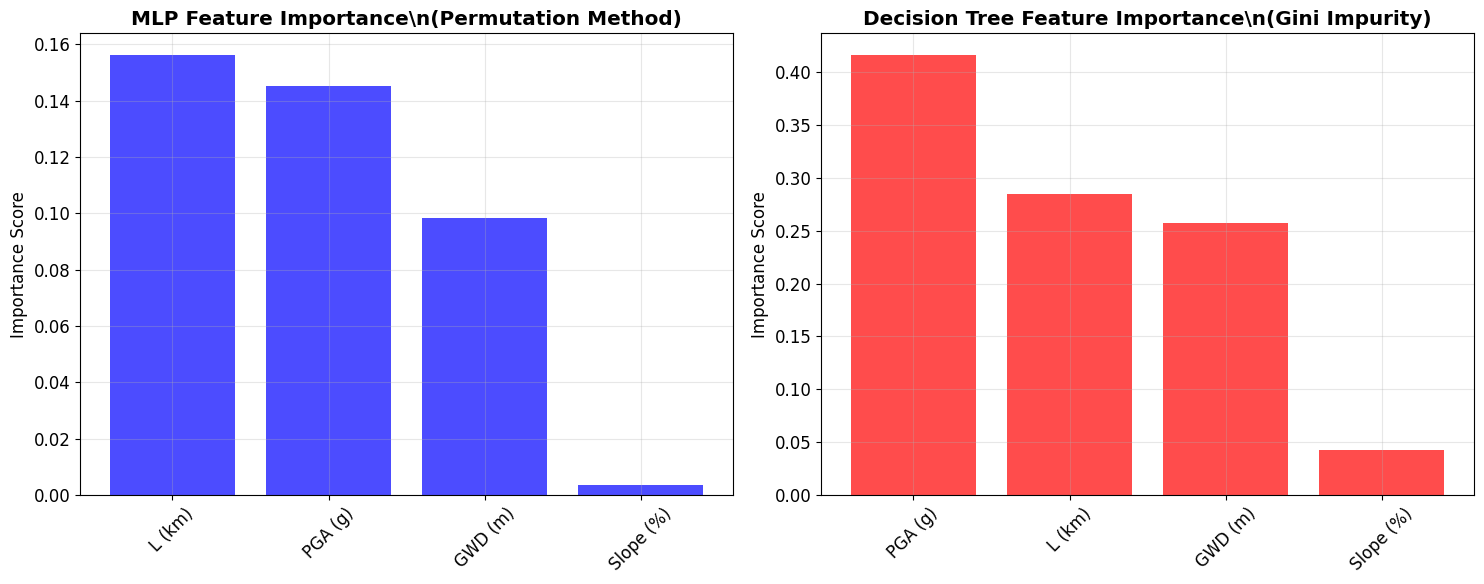

Feature Importance Rankings:
\nMLP (Permutation):
  1. L (km): 0.1561
  2. PGA (g): 0.1450
  3. GWD (m): 0.0983
  4. Slope (%): 0.0036
\nDecision Tree (Gini):
  1. PGA (g): 0.4157
  2. L (km): 0.2843
  3. GWD (m): 0.2570
  4. Slope (%): 0.0430


In [54]:
def calculate_mlp_feature_importance(model, X, y, feature_names, n_repeats=10):
    """Calculate feature importance using permutation method"""
    model.eval()
    
    # Baseline accuracy
    with torch.no_grad():
        baseline_pred = model.predict(X)
        baseline_acc = (baseline_pred.flatten() == y.flatten()).float().mean().item()
    
    importances = []
    
    for i, feature_name in enumerate(feature_names):
        feature_importances = []
        
        for _ in range(n_repeats):
            # Create a copy of the data
            X_permuted = X.clone()
            
            # Permute the i-th feature
            perm_idx = torch.randperm(X_permuted.shape[0])
            X_permuted[:, i] = X_permuted[perm_idx, i]
            
            # Calculate accuracy with permuted feature
            with torch.no_grad():
                permuted_pred = model.predict(X_permuted)
                permuted_acc = (permuted_pred.flatten() == y.flatten()).float().mean().item()
            
            # Importance = decrease in accuracy
            importance = baseline_acc - permuted_acc
            feature_importances.append(importance)
        
        importances.append(np.mean(feature_importances))
    
    return np.array(importances)

# Calculate feature importance for MLP
feature_names = X_data.columns.tolist()  # Use X_data instead of X
mlp_importances = calculate_mlp_feature_importance(model, X_test_tensor, y_test_tensor, feature_names)

# Get decision tree feature importance for comparison
dt_importances = dt_model.feature_importances_

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MLP feature importance
indices = np.argsort(mlp_importances)[::-1]
ax1.bar(range(len(mlp_importances)), mlp_importances[indices], color='blue', alpha=0.7)
ax1.set_title('MLP Feature Importance\\n(Permutation Method)', fontweight='bold')
ax1.set_xticks(range(len(feature_names)))
ax1.set_xticklabels([feature_names[i] for i in indices], rotation=45)
ax1.set_ylabel('Importance Score')
ax1.grid(True, alpha=0.3)

# Decision tree feature importance
indices_dt = np.argsort(dt_importances)[::-1]
ax2.bar(range(len(dt_importances)), dt_importances[indices_dt], color='red', alpha=0.7)
ax2.set_title('Decision Tree Feature Importance\\n(Gini Impurity)', fontweight='bold')
ax2.set_xticks(range(len(feature_names)))
ax2.set_xticklabels([feature_names[i] for i in indices_dt], rotation=45)
ax2.set_ylabel('Importance Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print feature importance rankings
print("Feature Importance Rankings:")
print("\\nMLP (Permutation):")
for i, idx in enumerate(indices):
    print(f"  {i+1}. {feature_names[idx]}: {mlp_importances[idx]:.4f}")

print("\\nDecision Tree (Gini):")
for i, idx in enumerate(indices_dt):
    print(f"  {i+1}. {feature_names[idx]}: {dt_importances[idx]:.4f}")

## MLP Architecture Experiments

In [55]:
# Experiment with different architectures
architectures = {
    'Small': [32],
    'Medium': [64, 32],
    'Large': [128, 64, 32],
    'Deep': [64, 64, 32, 16]
}

results = {}

print("Experimenting with different MLP architectures...\n")

for name, hidden_sizes in architectures.items():
    print(f"Training {name} network: {hidden_sizes}")
    
    # Create and train model
    arch_model = MLPClassifier(input_size=4, hidden_sizes=hidden_sizes, dropout_rate=0.2)
    arch_history = train_mlp_classifier(arch_model, X_train_tensor, y_train_tensor,
                                       X_val_tensor, y_val_tensor,
                                       epochs=500, lr=0.001, patience=30, verbose=False)
    
    # Evaluate on test set
    arch_model.eval()
    with torch.no_grad():
        test_pred_arch = arch_model.predict(X_test_tensor).numpy().flatten()
        test_proba_arch = arch_model.predict_proba(X_test_tensor).numpy().flatten()
    
    test_acc_arch = accuracy_score(y_test, test_pred_arch)
    test_auc_arch = roc_auc_score(y_test, test_proba_arch)
    
    # Count parameters
    n_params = sum(p.numel() for p in arch_model.parameters())
    
    results[name] = {
        'architecture': hidden_sizes,
        'accuracy': test_acc_arch,
        'auc': test_auc_arch,
        'parameters': n_params,
        'final_val_loss': arch_history['val_loss'][-1]
    }
    
    print(f"  Accuracy: {test_acc_arch:.4f}, AUC: {test_auc_arch:.4f}, Parameters: {n_params}\n")

# Create results comparison
results_df = pd.DataFrame(results).T
print("Architecture Comparison:")
print(results_df.round(4))

Experimenting with different MLP architectures...

Training Small network: [32]
  Accuracy: 0.6943, AUC: 0.7248, Parameters: 193

Training Medium network: [64, 32]
  Accuracy: 0.7375, AUC: 0.7849, Parameters: 2433

Training Large network: [128, 64, 32]
  Accuracy: 0.7629, AUC: 0.8328, Parameters: 11009

Training Deep network: [64, 64, 32, 16]
  Accuracy: 0.7505, AUC: 0.8276, Parameters: 7105

Architecture Comparison:
            architecture  accuracy       auc parameters final_val_loss
Small               [32]  0.694311  0.724753        193        0.61609
Medium          [64, 32]  0.737491  0.784937       2433       0.545634
Large      [128, 64, 32]  0.762851  0.832792      11009       0.489506
Deep    [64, 64, 32, 16]  0.750514  0.827604       7105        0.50668


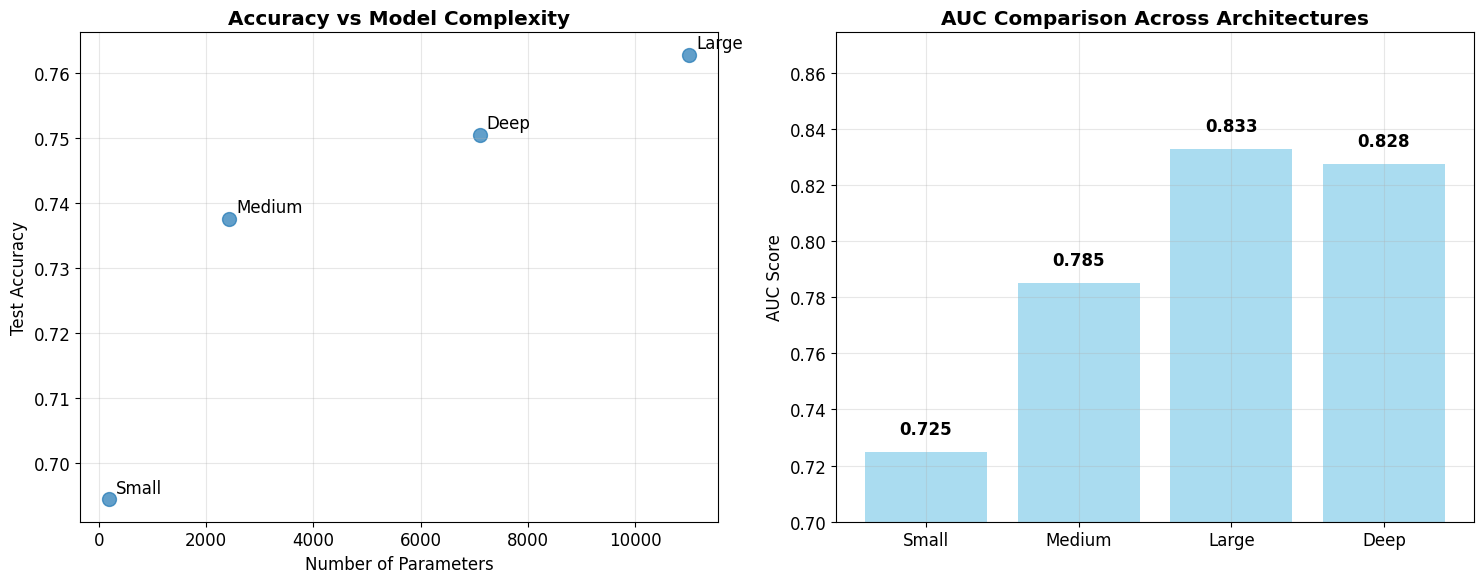


Best performing architecture: Large
Architecture: [128, 64, 32]
AUC: 0.8328
Accuracy: 0.7629
Parameters: 11009


In [56]:
# Visualize architecture comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy vs Parameters
architectures_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in architectures_names]
parameters = [results[name]['parameters'] for name in architectures_names]
aucs = [results[name]['auc'] for name in architectures_names]

ax1.scatter(parameters, accuracies, s=100, alpha=0.7)
for i, name in enumerate(architectures_names):
    ax1.annotate(name, (parameters[i], accuracies[i]), 
                xytext=(5, 5), textcoords='offset points')
ax1.set_xlabel('Number of Parameters')
ax1.set_ylabel('Test Accuracy')
ax1.set_title('Accuracy vs Model Complexity', fontweight='bold')
ax1.grid(True, alpha=0.3)

# AUC comparison
ax2.bar(architectures_names, aucs, color='skyblue', alpha=0.7)
ax2.set_ylabel('AUC Score')
ax2.set_title('AUC Comparison Across Architectures', fontweight='bold')
ax2.set_ylim(0.7, max(aucs) * 1.05)
ax2.grid(True, alpha=0.3)

# Add values on bars
for i, v in enumerate(aucs):
    ax2.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Find best architecture
best_arch = max(results.keys(), key=lambda x: results[x]['auc'])
print(f"\nBest performing architecture: {best_arch}")
print(f"Architecture: {results[best_arch]['architecture']}")
print(f"AUC: {results[best_arch]['auc']:.4f}")
print(f"Accuracy: {results[best_arch]['accuracy']:.4f}")
print(f"Parameters: {results[best_arch]['parameters']}")

## Summary and Key Insights

### What We've Learned:

1. **MLP for Classification**: Successfully adapted the MLP architecture from function approximation to classification
   - Same fundamental structure (input → hidden → output)
   - Different loss function (Cross-Entropy vs MSE)
   - Different output activation (Sigmoid vs Linear)

2. **Performance Comparison**:
   - MLP achieved comparable or better performance than Decision Trees
   - MLPs can learn more complex, non-linear decision boundaries
   - Feature importance patterns may differ between models

3. **Architecture Design**:
   - Deeper networks don't always perform better (diminishing returns)
   - Parameter efficiency varies across architectures
   - Regularization (dropout) helps prevent overfitting

### MLP Advantages:
- **Non-linear decision boundaries**: Can capture complex patterns
- **Universal approximation**: Theoretical guarantee of representational power
- **Gradient-based optimization**: Efficient training with backpropagation
- **Scalability**: Can handle large datasets and high-dimensional features

### MLP Disadvantages:
- **Black box**: Less interpretable than decision trees
- **Hyperparameter sensitivity**: Requires careful tuning
- **Computational cost**: More expensive than simple models
- **Overfitting risk**: Especially with limited data

### When to Use MLPs vs Decision Trees:

**Use MLPs when**:
- Complex, non-linear patterns are expected
- Large amounts of training data are available
- High predictive accuracy is priority
- Features have continuous, numerical values

**Use Decision Trees when**:
- Interpretability is crucial
- Dataset is small or medium-sized
- Features are mixed (categorical + numerical)
- Simple, rule-based explanations are needed